In [1]:
import glob
import joblib

In [2]:
from utils import convert_episodes_to_traj_class

In [3]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

In [4]:
from decision_bias_analysis_tools import ComputeFourBiasClips2
from parameters import EXPLORE, HOME_NODE, UnrewNamesSub
import evaluation_metrics as em

In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.size"] = 18

In [6]:
def load(model_name):
    if model_name == 'Animals':
        tfs = [LoadTrajFromPath(f'../outdata/{_}-tf') for _ in UnrewNamesSub]
        return tfs
    
#     if model_name == 'RandomWalk':
#         tfs = [LoadTrajFromPath('../outdata/rw01-tf')]
#         return tfs

    tfs = []
    for f in glob.glob(f'/Users/us3519/mouse-maze/figs/may28/{model_name}/MAX_LENGTH=50000/**/episodes_*.pkl'):
        s = joblib.load(f)
        tf = convert_episodes_to_traj_class(s["episodes_positions"], s["episodes_states"])
        tfs.append(tf)
    return tfs

In [7]:
def get_biases(tfs):
    bi = np.array([ComputeFourBiasClips2(tf,ma,SplitModeClips(tf,ma),mode=EXPLORE)[0] for tf in tfs]) # bias using exploration only
    return bi

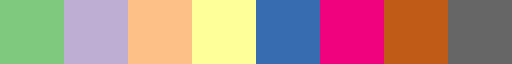

In [8]:
cmap = plt.get_cmap('Accent')
model_colors = {
    'Animals': 'r',
    'TeAltOptions': 'g',
    'TeRandomActionOptions': cmap(1),
    'TeFixedActionOptions': cmap(2),
    'RandomWalk': 'b',
    'Optimal': 'k:',
}
cmap

In [294]:
labels = {
    'Animals':      'Animals',
    'TeAltOptions':           'Alternating Seqs\n(default)',
    'TeRandomActionOptions':  'Random Seqs',
    'TeFixedActionOptions':   'Preservative Seqs',
    'RandomWalk':   'random',
    'Optimal':      'optimal',
}

In [240]:
figpath = '/Users/us3519/mouse-maze/figs/paper figs/figure_altoptions'
# os.makedirs(figpath, exist_ok=True)

In [14]:
ma=NewMaze()

In [15]:
bi_animals = get_biases(load('Animals'))

In [16]:
bi_altoptions = get_biases(load('TeAltOptions'))

In [17]:
bi_fixedactionoptions = get_biases(load('TeFixedActionOptions'))

In [18]:
bi_randomactionoptions = get_biases(load('TeRandomActionOptions'))

In [20]:
bi_randomwalk = np.array([[2/3, 1/2, 2/3, 1/2]])

In [21]:
model_colors

{'Animals': 'r',
 'TeAltOptions': 'g',
 'TeRandomActionOptions': (0.7450980392156863,
  0.6823529411764706,
  0.8313725490196079,
  1.0),
 'TeFixedActionOptions': (0.9921568627450981,
  0.7529411764705882,
  0.5254901960784314,
  1.0),
 'TeAltUnifOptions': (0.7490196078431373,
  0.3568627450980392,
  0.09019607843137253,
  1.0),
 'RandomWalk': 'b',
 'Optimal': 'k:'}

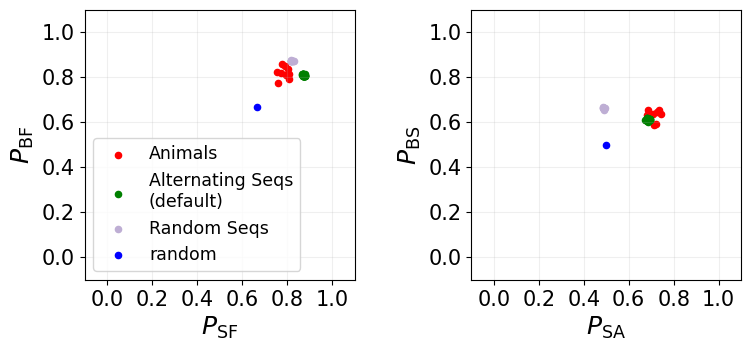

In [295]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3.8))

s = 20
alpha = 1
ax[0].scatter(bi_animals[:,0], bi_animals[:,2], color=model_colors["Animals"], label=labels['Animals'], s=s, alpha=alpha,)
ax[0].scatter(bi_altoptions[:,0], bi_altoptions[:,2], color=model_colors["TeAltOptions"], label=labels['TeAltOptions'], s=s, alpha=alpha,)
ax[0].scatter(bi_randomactionoptions[:,0], bi_randomactionoptions[:,2], color=model_colors["TeRandomActionOptions"], label=labels['TeRandomActionOptions'], s=s, alpha=alpha,)
ax[0].scatter(bi_randomwalk[:,0], bi_randomwalk[:,2], color=model_colors["RandomWalk"], label=labels['RandomWalk'],s=s, alpha=1,)


ax[1].scatter(bi_animals[:,1], bi_animals[:,3], color=model_colors["Animals"], label=labels['Animals'], s=s, alpha=alpha,)
ax[1].scatter(bi_altoptions[:,1], bi_altoptions[:,3], color=model_colors["TeAltOptions"], label=labels['TeAltOptions'], s=s, alpha=alpha,)
ax[1].scatter(bi_randomactionoptions[:,1], bi_randomactionoptions[:,3], color=model_colors["TeRandomActionOptions"], label=labels['TeRandomActionOptions'], s=s, alpha=alpha,)
ax[1].scatter(bi_randomwalk[:,1], bi_randomwalk[:,3], color=model_colors["RandomWalk"], label=labels['RandomWalk'],s=s, alpha=1,)

for _ in ax:
    _.tick_params(axis='both', labelsize='small')
    _.set_aspect('equal')
    _.set_xlim([-0.1,1.1])
    _.set_ylim([-0.1,1.1])
    _.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.grid(alpha=0.2)

ax[0].legend(loc='lower left', fontsize='x-small') 
# ax[1].legend(loc='lower left', fontsize='x-small') 
ax[0].set_xlabel('$P_{\mathrm{SF}}$', fontsize='medium')
ax[0].set_ylabel('$P_{\mathrm{BF}}$', fontsize='medium')
ax[1].set_xlabel('$P_{\mathrm{SA}}$', fontsize='medium')
ax[1].set_ylabel('$P_{\mathrm{BS}}$', fontsize='medium')


plt.tight_layout()
plt.savefig(f'{figpath}/decisionbiases_random.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

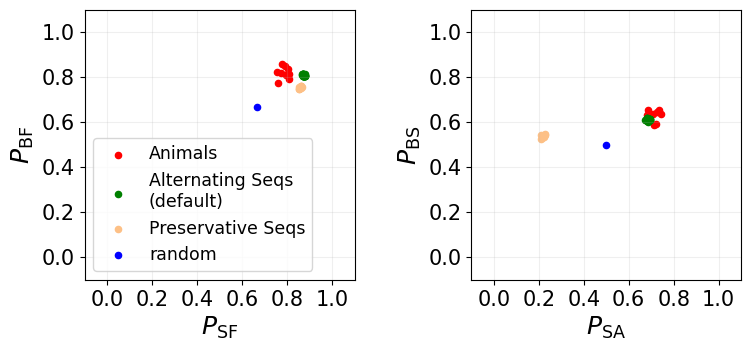

In [297]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3.8))

s = 20
alpha = 1
ax[0].scatter(bi_animals[:,0], bi_animals[:,2], color=model_colors["Animals"], label=labels['Animals'], s=s, alpha=alpha,)
ax[0].scatter(bi_altoptions[:,0], bi_altoptions[:,2], color=model_colors["TeAltOptions"], label=labels['TeAltOptions'], s=s, alpha=alpha,)
ax[0].scatter(bi_fixedactionoptions[:,0], bi_fixedactionoptions[:,2], color=model_colors["TeFixedActionOptions"], label=labels['TeFixedActionOptions'], s=s, alpha=alpha,)
ax[0].scatter(bi_randomwalk[:,0], bi_randomwalk[:,2], color=model_colors["RandomWalk"], label=labels['RandomWalk'],s=s, alpha=1,)


ax[1].scatter(bi_animals[:,1], bi_animals[:,3], color=model_colors["Animals"], label=labels['Animals'], s=s, alpha=alpha,)
ax[1].scatter(bi_altoptions[:,1], bi_altoptions[:,3], color=model_colors["TeAltOptions"], label=labels['TeAltOptions'], s=s, alpha=alpha,)
ax[1].scatter(bi_fixedactionoptions[:,1], bi_fixedactionoptions[:,3], color=model_colors["TeFixedActionOptions"], label=labels['TeFixedActionOptions'], s=s, alpha=alpha,)
ax[1].scatter(bi_randomwalk[:,1], bi_randomwalk[:,3], color=model_colors["RandomWalk"], label=labels['RandomWalk'],s=s, alpha=1,)

for _ in ax:
    _.tick_params(axis='both', labelsize='small')
    _.set_aspect('equal')
    _.set_xlim([-0.1,1.1])
    _.set_ylim([-0.1,1.1])
    _.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.grid(alpha=0.2)

ax[0].legend(loc='lower left', fontsize='x-small') 
# ax[1].legend(loc='lower left', fontsize='x-small') 
ax[0].set_xlabel('$P_{\mathrm{SF}}$', fontsize='medium')
ax[0].set_ylabel('$P_{\mathrm{BF}}$', fontsize='medium')
ax[1].set_xlabel('$P_{\mathrm{SA}}$', fontsize='medium')
ax[1].set_ylabel('$P_{\mathrm{BS}}$', fontsize='medium')


plt.tight_layout()
plt.savefig(f'{figpath}/decisionbiases_fixed.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [22]:
def get_expeff(tfs, le=6):
    y_tfs = []
    for tf in tfs:
        wcn=NewNodesMerge3(tf,ma,le) 
        x=wcn[1]
        y=wcn[2]
        y_tfs.append(y)

    min_len = min(len(_) for _ in y_tfs)
    y_tfs = np.array([_[:min_len] for _ in y_tfs])  # some tfs might not have all window sizes
    y_mu = np.mean(y_tfs, axis=0)
    y_std = np.std(y_tfs, axis=0)
    return x[:min_len], y_tfs, y_mu, y_std

In [25]:
def get_ee(model_names, le):
    ee_dict = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        tfs = load(model_name)[:30]
        print("len(tfs)", len(tfs))
        ee_dict[model_name] = get_expeff(tfs, le=le)
    return ee_dict

In [303]:
def plot_ee(exp_eff_dict, le, filename, figsize=(8, 4), axhline=32, xlim=(2, 2*(10**3)), ylim=(0, 2**6+2), labelpad=10):
    x_dfs=list(range(1, (2**le)+1))
    y_dfs=list(range(1, (2**le)+1))

    plt.figure(figsize=figsize)
    ax = plt.gca()

    for model_name in model_colors:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        xyy = exp_eff_dict.get(model_name, None)
        if not xyy: continue
        x, _, y_mu, y_std = xyy
        linewidth = 3 if model_name == 'Animals' else 1
        alpha = 1
        label = labels[model_name]
        if model_name == 'RandomWalk':
            linewidth = 0.5
            alpha = 0.8
        plt.plot(x, y_mu, c=model_colors[model_name], linestyle='-',linewidth=linewidth, label=label, alpha=alpha)
        if model_name != 'RandomWalk':
            ax.fill_between(x, y_mu+y_std, y_mu-y_std, color=model_colors[model_name], alpha=0.2)

    plt.plot(x_dfs,y_dfs,'k',linewidth=0.7, alpha=0.4, label='optimal')

    plt.axhline(axhline, ls=':', c='k')
    plt.legend(loc='lower right', fontsize='x-small')
    ax.tick_params(axis='both', labelsize='small')
    ax.set_xlabel(f'Nodes visited (Level {le})', fontsize='medium')
    ax.set_ylabel(f'New nodes found\n(Level {le})', fontsize='medium', labelpad=labelpad)
    plt.xscale('log')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    plt.savefig(f'{figpath}/{filename}', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal


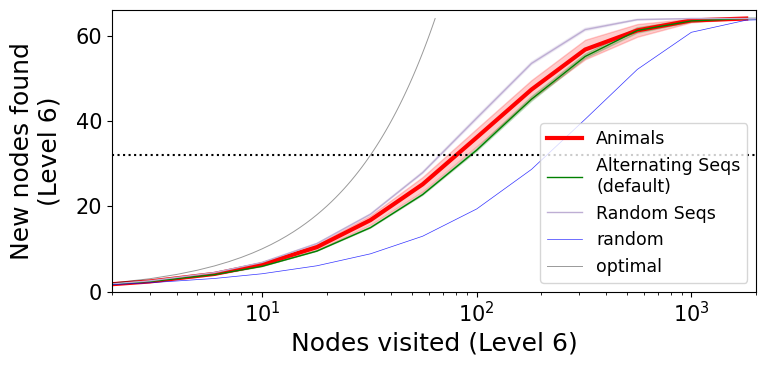

In [304]:
# exp_eff_dict_randomopt = get_ee(['Animals', 'TeAltOptions', 'TeRandomActionOptions', 'RandomWalk'], 6)
plot_ee(exp_eff_dict_randomopt, 6, filename='exp_eff_le6_altvsrandom.pdf', figsize=(8, 4))

Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal


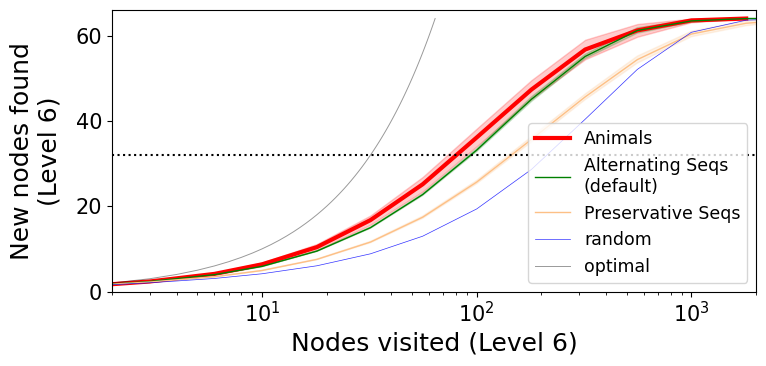

In [305]:
# exp_eff_dict_fixed = get_ee(['Animals', 'TeAltOptions', 'TeFixedActionOptions', 'RandomWalk'], 6)
plot_ee(exp_eff_dict_fixed, 6, filename='exp_eff_le6_altvsfixed.pdf', figsize=(8, 4))

Animals
len(tfs) 9
TeAltOptions
len(tfs) 30
TeAltUnifOptions
len(tfs) 20
RandomWalk
len(tfs) 20
Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal


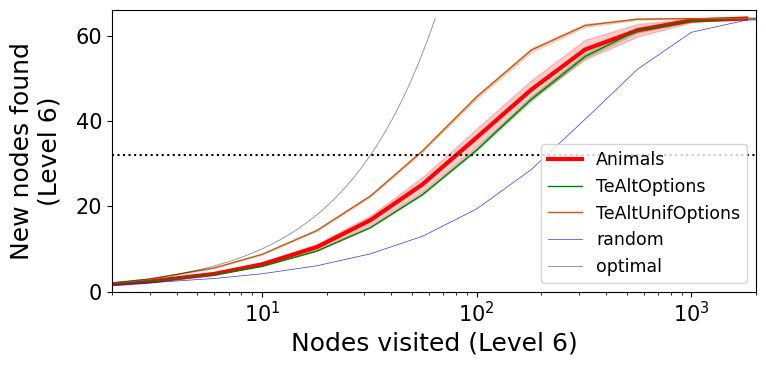

In [64]:
exp_eff_dict_unif = get_ee(['Animals', 'TeAltOptions', 'TeAltUnifOptions', 'RandomWalk'], 6)
plot_ee(exp_eff_dict_unif, 6, filename='exp_eff_le6_altvsunif.pdf', figsize=(8, 4))

Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal


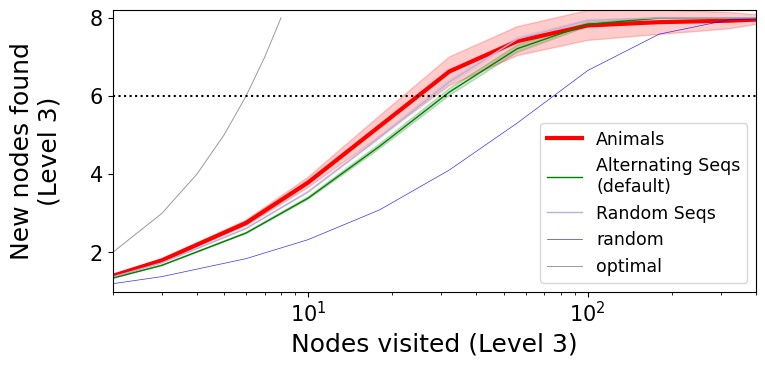

In [306]:
# exp_eff_dict_randomopt3 = get_ee(['Animals', 'TeAltOptions', 'TeRandomActionOptions', 'RandomWalk'], 3)
plot_ee(exp_eff_dict_randomopt3, 3, filename='exp_eff_le3_altvsrandom.pdf', figsize=(8, 4), axhline=6, xlim=(2, 400), ylim=(1, 2**3+0.2), labelpad=20)

Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal


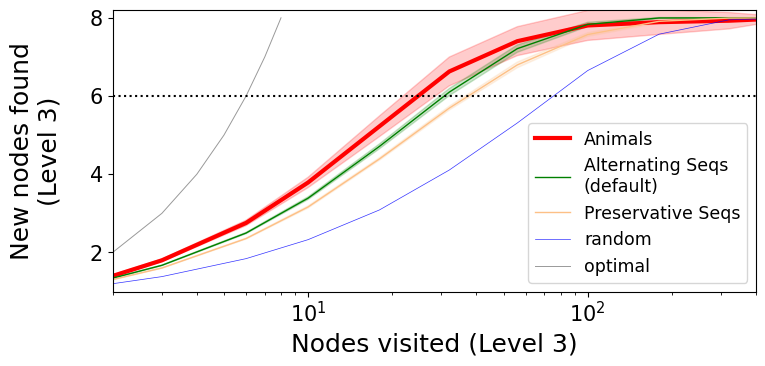

In [307]:
# exp_eff_dict_fixed3 = get_ee(['Animals', 'TeAltOptions', 'TeFixedActionOptions', 'RandomWalk'], 3)
plot_ee(exp_eff_dict_fixed3, 3, filename='exp_eff_le3_altvsfixed.pdf', figsize=(8, 4), axhline=6, xlim=(2, 400), ylim=(1, 2**3+0.2), labelpad=20)

Animals
len(tfs) 9
TeAltOptions
len(tfs) 30
TeAltUnifOptions
len(tfs) 20
RandomWalk
len(tfs) 20
Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal


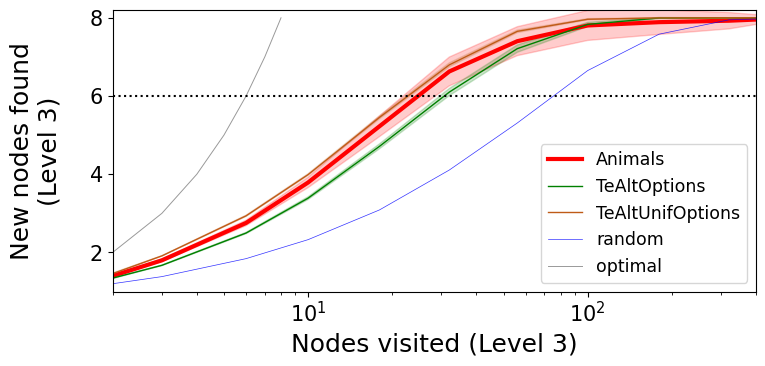

In [70]:
# exp_eff_dict_unif3 = get_ee(['Animals', 'TeAltOptions', 'TeAltUnifOptions', 'RandomWalk'], 3)
plot_ee(exp_eff_dict_unif3, 3, filename='exp_eff_le3_altvsunif.pdf', figsize=(8, 4), axhline=6, xlim=(2, 400), ylim=(1, 2**3+0.2), labelpad=20)

In [71]:
def get_oiratio(tfs):
    return [em.outside_inside_ratio(tf, re=False) for tf in tfs]

In [75]:
def get_oi(model_names):
    oi_dict = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
#         elif model_name in ['BiasedWalk4']:
#             Vuw = animal_oi()[len(p.RewNames):]
#             ratios = [np.mean(a[outer])/np.mean(a[inner]) for a in Vuw]
#             oi_dict[model_name] = ratios
        else:
            tfs = load(model_name)[:30]
            print("len(tfs)", len(tfs))
            oi_dict[model_name] = get_oiratio(tfs)
    return oi_dict

In [117]:
oi_ratios_dict = get_oi()
# del oi_ratios_dict['RandomWalk']

Animals
len(tfs) 9
TeAltOptions
len(tfs) 30
TeRandomActionOptions
len(tfs) 10
TeFixedActionOptions
len(tfs) 10
TeAltUnifOptions
len(tfs) 20
RandomWalk
len(tfs) 20
Optimal


In [118]:
oi_ratios_dict.keys()

dict_keys(['Animals', 'TeAltOptions', 'TeRandomActionOptions', 'TeFixedActionOptions', 'TeAltUnifOptions'])

In [78]:
from scipy.stats import sem

In [308]:
def plot_oi(oi_ratios_dict, filename):
    plt.figure(figsize=(3, 3.5))
    ax = plt.gca()
    xticks = []
    for i, model_name in enumerate(oi_ratios_dict):
        print(model_name)
        ratios = oi_ratios_dict[model_name][:10]
        jitter = np.random.uniform(-0.05, 0.05, size=len(ratios))
    #     plt.plot(i+jitter, ratios, c=model_colors[model_name], marker='.', linestyle='none', markersize=10, alpha=1, label=model_name)
        mean_ratio = np.mean(ratios)
        print("mean_ratio", mean_ratio)
        plt.bar(i/2, mean_ratio, yerr=sem(ratios), color=model_colors[model_name], width=0.3, capsize=2, alpha=0.8, label=labels[model_name])
        xticks.append(model_name)

    plt.axhline(1, ls=':', c=model_colors['RandomWalk'], lw=2, label='random')
#     plt.xticks(range(len(xticks)), xticks, rotation=0)
    ax.tick_params(axis='both', labelsize='xx-small')
    plt.ylabel('Outgoing Tendency', fontsize='medium')
#     plt.legend(loc='upper right', fontsize='xx-small')
    plt.margins(0.1)
    plt.tight_layout()
    plt.savefig(f'{figpath}/{filename}', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    return

Animals
mean_ratio 2.3014239785230157
TeAltOptions
mean_ratio 2.5708173766265716
TeRandomActionOptions
mean_ratio 1.005771984469873


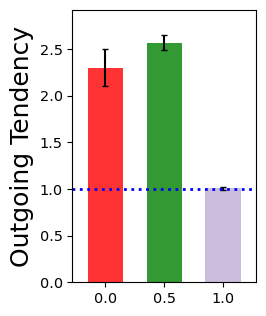

In [309]:
# oi_ratios_dict_randomopt = get_oi(['Animals', 'TeAltOptions', 'TeRandomActionOptions'])
plot_oi(oi_ratios_dict_randomopt, filename='oiratio_altvssrandom.pdf')

Animals
mean_ratio 2.3014239785230157
TeAltOptions
mean_ratio 2.5708173766265716
TeFixedActionOptions
mean_ratio 0.21697974411613236


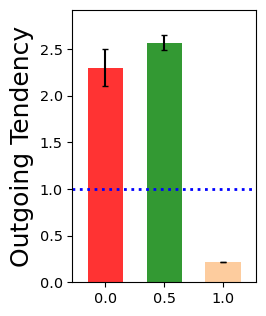

In [310]:
# oi_ratios_dict_fixed = get_oi(['Animals', 'TeAltOptions', 'TeFixedActionOptions'])
plot_oi(oi_ratios_dict_fixed, filename='oiratio_altvssfixed.pdf')

In [90]:
from collections import defaultdict
import parameters as p


In [91]:
def get_firstnode(tfs):
    dicts = [em.first_endnode_label(tf) for tf in tfs]
    merged = defaultdict(list)
    for d in dicts:
        for k, v in d.items():
            merged[k].append(v)
    return merged

def get_firstnode_dict(model_names):
    firstnode_dict = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        elif model_name in ['Animals']:
            with open(p.OUTDATA_PATH + 'first_endnode_label_unrewarded.pkl', 'rb') as f:
                first_endnode_label_animal = pickle.load(f)
            firstnode_dict[model_name] = first_endnode_label_animal
        else:
            tfs = load(model_name)[:10]
            print("len(tfs)", len(tfs))
            firstnode_dict[model_name] = get_firstnode(tfs)
    return firstnode_dict

In [311]:
def plot_firstnodetype(firstnode_dict, filename):
    fig = plt.figure(figsize=(5, 3.9))
    ax = plt.gca()

    for m, model_name in enumerate(firstnode_dict):
        values_dict = firstnode_dict[model_name]
        new_values_dict = {'str': values_dict['straight'], 'opp': values_dict['opposite straight'], 'bent': values_dict['bent straight'], 'opp\nbent': values_dict['opposite bent straight']}
        for i, t in enumerate(new_values_dict):
            data = np.array(new_values_dict[t])
    #         print(m, i, data, f'{round(np.mean(data), 3)}\% \pm {round(sem(data), 3)}\%')
            plt.bar(i+m*0.15, np.mean(data), color=model_colors[model_name], yerr=sem(data), 
                   label=labels[model_name] if i == 0 else '', capsize=2, width=0.15, alpha=0.9)

    plt.axhline(25, c=model_colors['RandomWalk'], ls=':', lw=2, label=labels['RandomWalk'])

    ax.legend(fontsize='x-small')
    ax.set_ylabel('% of first node types', fontsize='medium')
    ax.set_yticks([0, 25, 50, 75])
    ax.set_xticks(np.arange(len(new_values_dict))+0.15, list(new_values_dict.keys()))
    ax.tick_params(axis='x', labelsize='small', length=0)
    ax.tick_params(axis='y', labelsize='small')
    plt.tight_layout()

    plt.savefig(f'{figpath}/{filename}', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    return

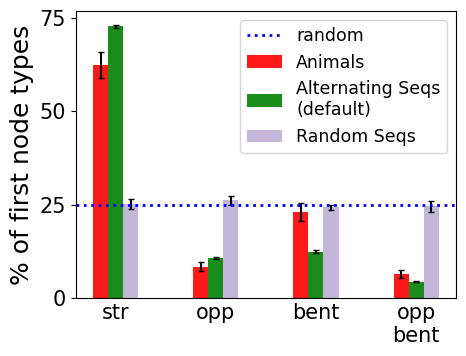

In [312]:
# firstnode_dict_randomopt = get_firstnode_dict(['Animals', 'TeAltOptions', 'TeRandomActionOptions'])
plot_firstnodetype(firstnode_dict_randomopt, 'firstnodetype_altvsrandom.pdf')

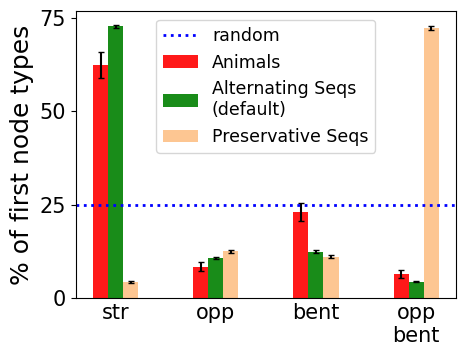

In [313]:
# firstnode_dict_fixed = get_firstnode_dict(['Animals', 'TeAltOptions', 'TeFixedActionOptions'])
plot_firstnodetype(firstnode_dict_fixed, 'firstnodetype_altvsfixed.pdf')

Animals
TeAltOptions
len(tfs) 10
TeAltUnifOptions
len(tfs) 10


/Users/us3519/miniconda3/envs/sleap/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/us3519/miniconda3/envs/sleap/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/us3519/miniconda3/envs/sleap/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/us3519/miniconda3/envs/sleap/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/us3519/miniconda3/envs/sleap/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/us3519/m

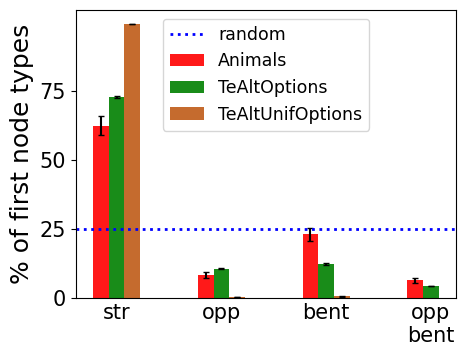

In [95]:
firstnode_dict_unif = get_firstnode_dict(['Animals', 'TeAltOptions', 'TeAltUnifOptions'])
plot_firstnodetype(firstnode_dict_unif, 'firstnodetype_altvsunif.pdf')

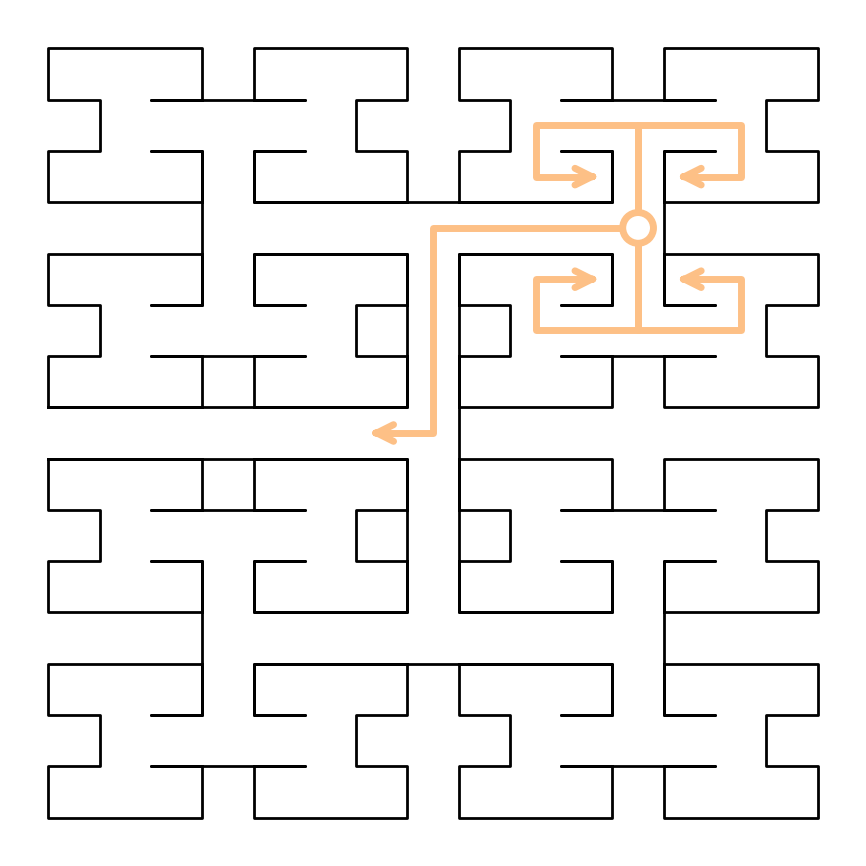

In [242]:
from matplotlib.patches import Circle

ax = PlotMazeFunction(np.zeros(127), ma, mode='nodes', numcol='', figsize=9)

color=model_colors['TeFixedActionOptions']
linewidth = 5

plt.plot([11, 11, 13, 13, 12], [3, 5, 5, 4, 4], linewidth=linewidth, color=color)
plt.annotate('', xy=(12, 4), xytext=(11.7, 4), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 11, 13, 13, 12], [3, 1, 1, 2, 2], linewidth=linewidth, color=color)
plt.annotate('', xy=(12, 2), xytext=(11.7, 2), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 11, 9, 9, 10], [3, 5, 5, 4, 4], linewidth=linewidth, color=color)
plt.annotate('', xy=(10, 4), xytext=(10.3, 4), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 11, 9, 9, 10], [3, 1, 1, 2, 2], linewidth=linewidth, color=color)
plt.annotate('', xy=(10, 2), xytext=(10.3, 2), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 7, 7, 6], [3, 3, 7, 7], linewidth=linewidth, color=color)
plt.annotate('', xy=(6, 7), xytext=(5.7, 7), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

ax.add_patch(Circle((11, 3), 0.3, edgecolor=color, facecolor='white', linewidth=5, alpha=1, zorder=10))

plt.axis('off')
plt.savefig(f'{figpath}/fixedactionoption.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

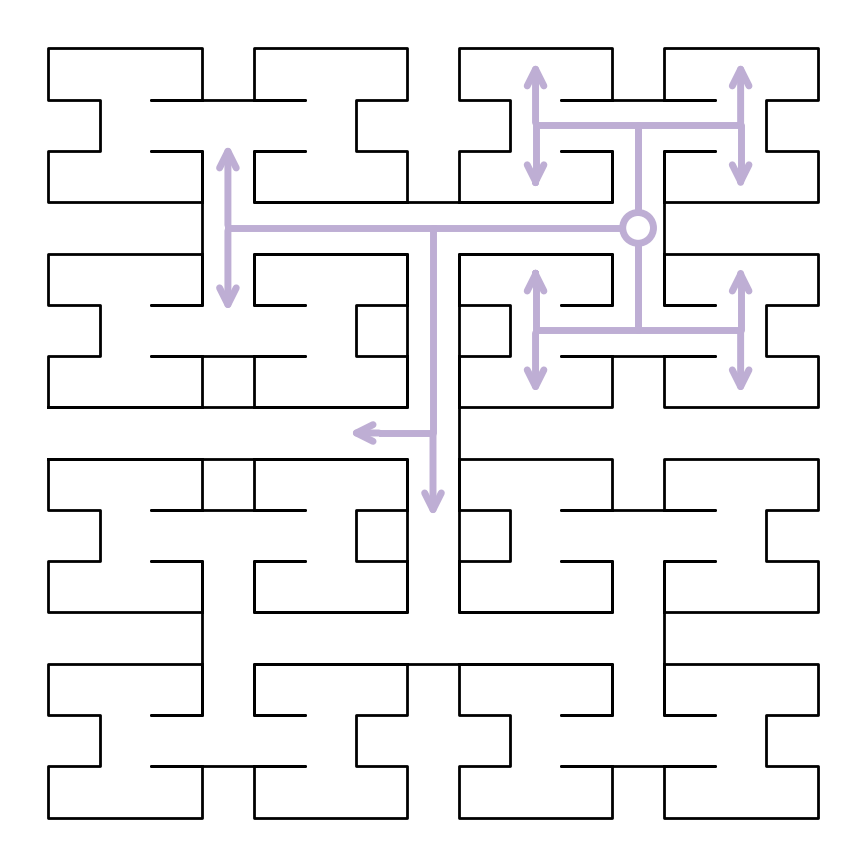

In [241]:
from matplotlib.patches import Circle

ax = PlotMazeFunction(np.zeros(127), ma, mode='nodes', numcol='', figsize=9)

color=model_colors['TeRandomActionOptions']
linewidth = 5

plt.plot([11, 11, 13, 13], [3, 5, 5, 4], linewidth=linewidth, color=color)
plt.annotate('', xy=(13, 4), xytext=(13, 3.7), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))
plt.annotate('', xy=(13, 5), xytext=(13, 6.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 11, 13, 13], [3, 1, 1, 2], linewidth=linewidth, color=color)
plt.annotate('', xy=(13, 2), xytext=(13, 2.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))
plt.annotate('', xy=(13, 1), xytext=(13, -0.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 11, 9, 9], [3, 5, 5, 4], linewidth=linewidth, color=color)
plt.annotate('', xy=(9, 4), xytext=(9, 3.7), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))
plt.annotate('', xy=(9, 5), xytext=(9, 6.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 11, 9, 9], [3, 1, 1, 2], linewidth=linewidth, color=color)
plt.annotate('', xy=(9, 2), xytext=(9, 2.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))
plt.annotate('', xy=(9, 1), xytext=(9, -0.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([11, 7, 7, 6], [3, 3, 7, 7], linewidth=linewidth, color=color)
plt.annotate('', xy=(6, 7), xytext=(5.3, 7), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))
plt.annotate('', xy=(7, 7), xytext=(7, 8.7), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

plt.plot([7, 3], [3, 3], linewidth=linewidth, color=color)
plt.annotate('', xy=(3, 3), xytext=(3, 4.7), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))
plt.annotate('', xy=(3, 3), xytext=(3, 1.3), arrowprops=dict(arrowstyle='<-', color=color, linewidth=linewidth, mutation_scale=30))

ax.add_patch(Circle((11, 3), 0.3, edgecolor=color, facecolor='white', linewidth=5, alpha=1, zorder=10))

plt.axis('off')
plt.savefig(f'{figpath}/randomactionoption.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [314]:
model_colors['mouse B5'] = model_colors['Animals']
model_colors['mouse D3'] = model_colors['Animals']

In [315]:
def nodebias(tr, ma):
    tu = TallyNodeStepTypes(tr,ma)
    n = 2**ma.le-1 # number of nodes below end node level
    bl = tu[:n,0]/(tu[:n,0]+tu[:n,1]) # inleft/(inleft+inright)
    sl = np.sqrt(tu[:n,0]*tu[:n,1]/(tu[:n,0]+tu[:n,1])**3) # std dev
    return bl, sl

def get_nodebias_dict(model_names):
    nodebias_d = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal', 'RandomWalk', 'Animals']:
            continue
        elif model_name in ['mouse B5']:
            bl, sl = nodebias(LoadTrajFromPath('../outdata/B5-tf'), ma)
        elif model_name in ['mouse D3']:
            bl, sl = nodebias(LoadTrajFromPath('../outdata/D3-tf'), ma)
        else:
            tf = load(model_name)[0]
            bl, sl = nodebias(tf, ma)
        nodebias_d[model_name] = (bl, sl)
    return nodebias_d

In [322]:
def plot_percent_turns(model_names, filename):

    plt.figure(figsize=(10, 4))
    for m in model_names:
        bl, sl = nodebias_dict[m]
        plt.errorbar(range(len(bl)), bl, yerr=sl, c=model_colors[m], linewidth=1.5, label=labels.get(m, m))

    plt.axhline(0.5, lw=1.5, ls=':', c=model_colors['RandomWalk'], label=labels['RandomWalk'])
    plt.title('Spatial distribution of left-right bias', fontsize='medium')
    plt.legend(loc='lower left', fontsize='x-small')
    plt.xlabel('Node', fontsize='medium')
    plt.ylabel('left/(left+right)', fontsize='medium')
    plt.tick_params(axis='both', labelsize='small')
    plt.grid(alpha=0.3)
    plt.ylim(0, 1)
    plt.tight_layout()
    
    plt.savefig(f'{figpath}/{filename}', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()
    return

In [320]:
nodebias_dict = get_nodebias_dict(model_colors)

Animals
TeAltOptions
TeRandomActionOptions
TeFixedActionOptions
TeAltUnifOptions
RandomWalk
Optimal
mouse B5
mouse D3


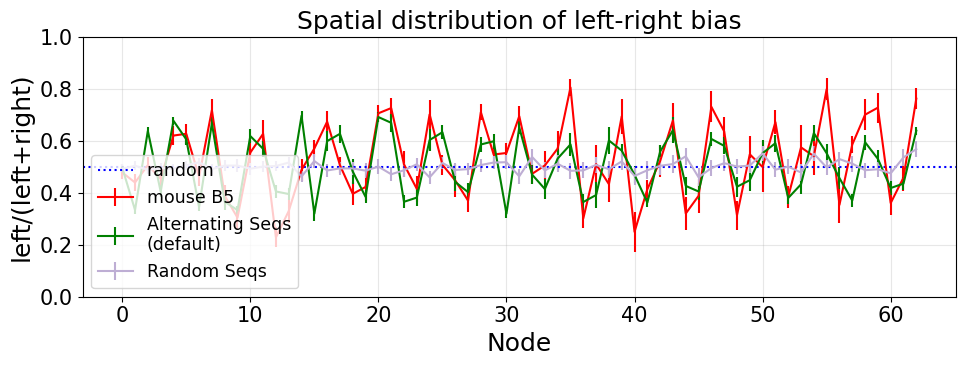

In [323]:
plot_percent_turns(['mouse B5', 'TeAltOptions', 'TeRandomActionOptions'], filename='nodebias_b5_randomopt.pdf')

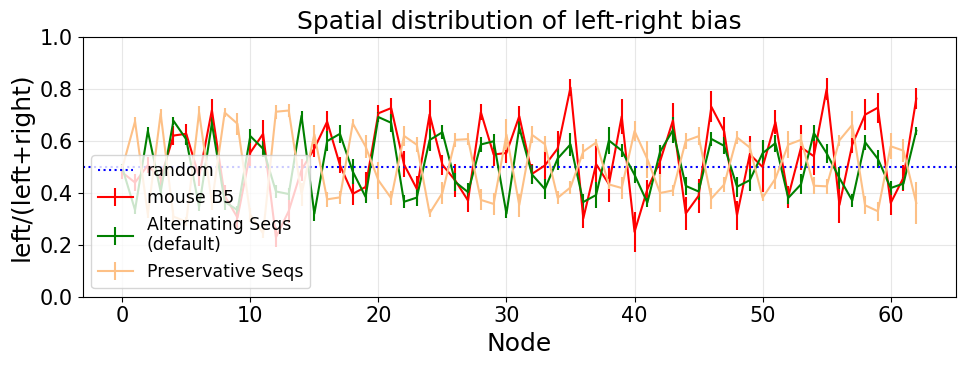

In [324]:
plot_percent_turns(['mouse B5', 'TeAltOptions', 'TeFixedActionOptions'], filename='nodebias_b5_fixedopt.pdf')